In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Constrained Optimization.

This is just a problem of finding absolute extrema on a closed region (in Calculus 1, you did this on closed interval). We will first generalize to to higher dimension. In calculus 1, we had an Absolute Extrema Theorem, that said: "A differentiable function on closed interval must have absolute minumum and absolute maximum". This generalizes to higher dimension, except now our differentiable function is defined on closed region. Let's look at the example.

### Problem 1

Let $F(x,y)=x^2-y$. Find minimum and maximum of $F(x,y)$ subject to constrain $x^2+y^2\leq 1$.

#### Solution

In Calc 1, to solve similar problems, we would find critical points. Then evaluate our function at critical points and at end points to find absolute extrema. We will apply similar approach here as well:
1. We would find critical points inside the region.
2. We would find extrema points on the boundary.
3. Then we would evaluate our function at all of those points to find absolute extrema.


#### Part 1. 

Since we have two variables, we will find both partial derivatives:

$$\frac{\partial F}{\partial x}=2x,\text{   } \frac{\partial F}{\partial y}=-1$$

We want both partial derivative to be zero and it is clearly impossible in this case, so extrema must be in boundary.

#### Part 2.

Our boundary is a circle $x^2+y^2 = 1$. Solving it for one of the variables, we get $x^2=1-y^2$. Substitute this into $F$, we get $F=1-y^2-y$. To find extrema, we differentiate this to get $\frac{dF}{dy}=-2y-1$. Equating this to zero and solving for $y$, we get $y=-1/2$. (This is a legal value since $y$ should be between -1 and 1). Then, solve for $x$ to get $x=\pm\frac{\sqrt{3}}{2}$. The end points for $y$ are -1 and 1 (with $x=0$ for both). 

#### Part 3. 

Let's check all of them:

$$F\left(\frac{\sqrt{3}}{2}, \frac{-1}{2}\right)= \frac{3}{4}+\frac{1}{2} = \frac{5}{4}$$
$$F\left(\frac{-\sqrt{3}}{2}, \frac{-1}{2}\right)= \frac{3}{4}+\frac{1}{2} = \frac{5}{4}$$
$$F\left(0, 1\right)= 0-1 = -1$$
$$F\left(0, -1\right)= 0+1 = 1$$

So, the result is we have absolute minimum of $-1$ at $(0,1)$ and absolute maximum of $5/4$ at two points, $\left(\frac{\sqrt{3}}{2}, \frac{-1}{2}\right)$ and $\left(\frac{-\sqrt{3}}{2}, \frac{-1}{2}\right)$. We will solve this problem again in a different way later.

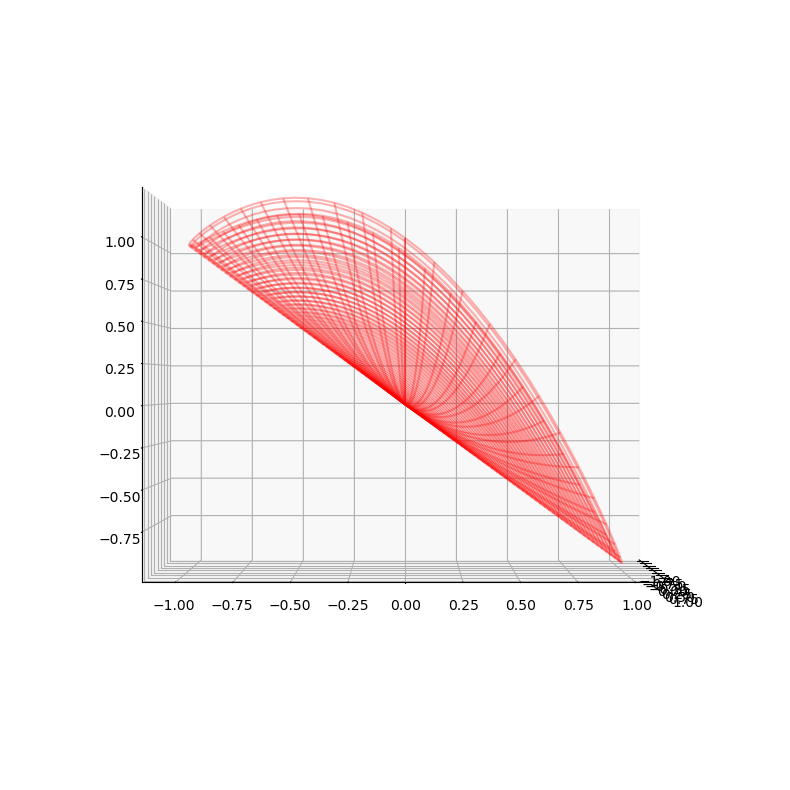

In [7]:
# x-coordinats

t = np.linspace(0,2*np.pi,100)
r= np.linspace(0,1,100)
tm, rm = np.meshgrid(t,r)
x=rm*np.cos(tm)
y=rm*np.sin(tm)


z=x**2-y
fig= plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z, linewidth = 1.5, alpha = .3, color = 'r')
ax.view_init(elev=0, azim=0)
plt.show()

Let's solve another one this time with a square boundary and some critical points inside as well.

### Problem 2 

Find absolute extrema of $F(x,y)=x^2+4y^2-2x^2y$ on a square given by $-1 \leq x \leq 1$ and $-1 \leq y \leq 1$.

#### Solution

#### Part 1.

$$\frac{\partial F}{\partial x}=2x-4xy,\text{   } \frac{\partial F}{\partial y}=8y-2x^2$$

We want both to be zero. So we have,

$$2x-4xy=0,\text{   } 8y-2x^2=0$$

From second equation we have $y=x^2/4$. Substituting this to the first equation, leads to $2x-x^3=0$, which in turn gives us $x=0$ and $x=\pm \sqrt{2}$. However, only $x=0$ is a legal value (the other ones are outside the rectangle). If $x=0$, we can solve it for $y$, which leads to $y=0$ as well.

So we have one critical point $(0, 0)$. Let's evaluate $F(0,0)=0$

#### Part 2. 

Now for boundary. This time it's a bit long since we have four sides and we need to look at them separatelly. Note some sides share end-points. In fact, the end points are just corners of our square. We can look at them later.

1. $x=1$ leads to $F(1,y)=1+4y^2-2y$. Derivative w.r.t to $y$ is $8y-2$. Finding extrema: $y=1/4$. So, final candidate is $(1, 1/4)$. Evaluating $F(1, 1/4)=1+1/4-1/2=3/4$.
2. $x=-1$ leads to $F(-1,y)=1+4y^2-2y$. This leads to the same answer as $x=1$.
3. $y=1$ leads to $F(x,1)=x^2+4-2x^2=4-x^2$. Derivative w.r.t to $x$ is $-2x$. Finding extrema: $x=0$. So, final candidate is $(0, 1)$. Evaluating $F(0,1)=4$.
4. $y=-1$ leads to $F(x,-1)=x^2+4+2x^2=4+3x^2$. Derivative w.r.t to $x$ is $6x$. Finding extrema: $x=0$. So, final candidate is $(0, -1)$. Evaluating $F(0,-1)=4$.

Now corners:

1. $F(1,1)=3$
2. $F(-1,1)=3$
3. $F(-1,-1)=7$
4. $F(1,-1)=7$

#### Part 3.

Finally, lookng at all values we see that $F$ has a maximum of $7$ at two points: $(-1, -1)$ and $(-1, 1)$; and $F$ has a minimum of $0$ at $(0,0)$.

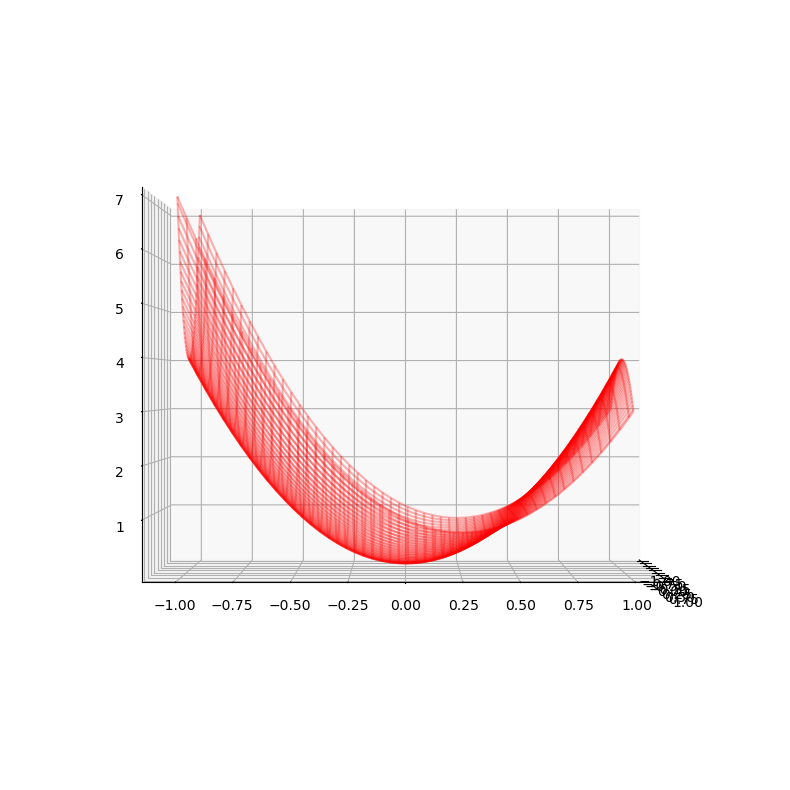

In [8]:
# x-coordinats

xt = np.linspace(-1,1,100)
yt= np.linspace(-1,1,100)
x,y = np.meshgrid(xt,yt)



z=x**2+4*y**2-2*x**2*y
fig= plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,z, linewidth = 1.5, alpha = .3, color = 'r')
ax.view_init(elev=0, azim=0)
plt.show()

## Langrange Multipliers

Let's look at our problem 1 through a different point of view. Given some values $x$ and $y$, $F(x,y)=x^2-y=k$ for some $k$. And we want to find largest and smallest value of $k$. I can rewrite our $F$'s as follows $y=x^2-k$. In the $xy$-plane, these are parabolas shifted by $k$. Let's plot some of these parabolas and our contrained equation.

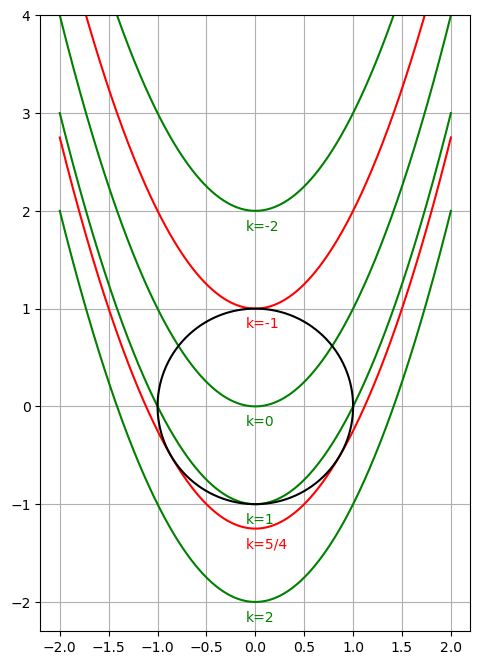

In [9]:


fig=plt.figure(figsize=(8,8))
x=np.linspace(-2,2, 1000)
plt.grid()
for k in np.array([-2, 0,1,2]):
    y=x**2-k
    plt.plot(x,y, 'g')
    plt.annotate('k={}'.format(k), xy=(-0.1,-k-0.2), color='g')
plt.plot(x,x**2+1, 'r')
plt.annotate('k=-1', xy=(-0.1,1-0.2), color='r')
plt.plot(x,x**2-5/4, 'r')
plt.annotate('k=5/4', xy=(-0.1,-5/4-0.2), color='r')
t=np.linspace(0, 2*np.pi, 1000)
plt.plot(np.cos(t), np.sin(t), 'k')
plt.gca().set_aspect('equal')
plt.ylim(-2.3, 4)
plt.show()

Our solutions must be on our constrained disk. So for example, $k=2$ is impossible, since that curve doesnt intersect our constrained disk. The smallest $k$ can be is -1 and the largest it can be is $5/4$ (both are in red) which are the solutions we have found in Problem 1. You can also see that for $k=5/4$ we are going to have two solutions.

So how can we find these $k$'s and corresponding points? Look carefully how red curves connect to circle and how green curves connect to circle. You should notice, that red curves are tangent to the circle. If two curves are tangent to each other, this means their derivative (gradients) point in the same direction, but they may have different scale. This leads to the following:

Suppose we want to optimize $F(...)$ given constrain $g(...)=a$

$$\nabla F(...)=\lambda \nabla g(...)$$
$$ g(...)=a$$

The $\lambda$ is that scaling factor and it is called Lagrange Multiplier. Solving this system, gives us our solutions as well. Let's see how it works in case of Problem 1.

### Problem 1 (version 2)

Let $F(x,y)=x^2-y$. Find minimum and maximum of $F(x,y)$ subject to constrain $x^2+y^2\leq 1$.

#### Solution

Our $g$ in this case is $g=x^2+y^2$, so our new system of equations is 

$$\frac{\partial F}{\partial x}=\lambda \frac{\partial g}{\partial x}$$
$$\frac{\partial F}{\partial y}=\lambda \frac{\partial g}{\partial y}$$
$$g=1$$

More precisely,

$$2x=2\lambda x$$
$$-1=2\lambda y$$
$$x^2+y^2=1$$

From the first equation, we can see either $x=0$ or $\lambda =1$.

If $x=0$, then from third equation $y= \pm 1$.

If $\lambda=1$, then from second equation $y=-1/2$ and then from third equation $x=\pm \sqrt{3}/2$

FInally, as before, we evaluate each possibility:

1. $F(0,1)=-1$
2. $F(0,-1)=1$
3. $F(\pm \sqrt{3}/2, -1/2)=5/4$

So we get the same answer as before.

### A few notes regarding this method

1. While we did solve the problem, Lagrange Multiplier method doesn't always produce all solution as it may miss some that are at the ends of ranges of our variables. Therefore, it is usually a good idea to check those values as well. For example, in above problem, this means we would have to check $(0, \pm 1)$ and $(\pm 1, 0)$. We did in fact check the first pair and the second pair leads to $F(\pm 1, 0)=1$, which is not a solution.

2. There are cases, when we know that no boundary solutions are possible. When our constrain $g$ is differentiable, then Lagrange Multiplier method will not miss anything (in above problem $g=x^2+y^2$, which is differentiable, so we didnt actually had to check end points.) If you have multiple contrains, then their intersection is unlikely to be differentiable even though they are differentiable themselves. This is the most common way for Lagrange Multiplier method to not produce all extrema.

3. We normally also have to check that our region is closed to make sure we have absolute extrema. In this case, we already knew that from solving the problem the first time.

4. While the problem has inequality $g \leq 1$, we replaced it with equation $g=1$. We only need inequality when we look for legality of critical points.

5. It is possible to have multiple constrained equations. In this case, we would have multiple Lagrange Multipliers and our problem will look as follows:

Suppose we are trying to optimize $F(...)$ given constrains $g(...)=a$ and $h(...)=b$. Then we need to solve the following system:

$$\nabla F(...)=\lambda \nabla g(...)+\mu \nabla h(...)$$
$$g(...)=a$$
$$h(...)=b$$

### Problem 3

Find absolute extrema of $F(x,y,z)=x+y+z^2$ subject to constrains $x+y+z=1$ and $x^2+z^2=1$.

#### Solution

Checking closure: Both $x$ and $z$ are a bounded between $-1$ and $1$ by the second contrained equation. Taking this into account we can see that $y$ is also bounded by first equation ($y=1-x-z$) between $1-\sqrt{2}$ and $1+\sqrt{2}$.

Setting up equations:

$$1=\lambda +2\mu x$$
$$1=\lambda$$
$$2z=\lambda+2\mu z$$
$$x+y+z=1$$ 
$$x^2+z^2=1$$


We can see that $\lambda =1$, so then by first equation we have $2\mu x=0$, so either $x=0$ or $\mu=0$.

1. If $x=0$, then by last equation $z= \pm 1$; and by fourth equation $y=1 -z = 0, 2$. So, two possibilities $(0, 2, -1)$ and $(0, 0, 1)$
2. If $\mu=0$, then by third equation $z=1/2$; then $x=\pm \sqrt{3}/2$, $y=1/2-x$, giving us two more possibilities $(\sqrt{3}/2, 1/2-\sqrt{3}/2, 1/2)$ and $(-\sqrt{3}/2, 1/2+\sqrt{3}/2, 1/2)$

Let's test them

$F(0,2,-1)=3$

$F(0,0,1)=1$

$F(\sqrt{3}/2, 1/2-\sqrt{3}/2, 1/2)=3/4$

$F(-\sqrt{3}/2, 1/2+\sqrt{3}/2, 1/2)=3/4$


Our region is an intersection of a cylinder and a plane: it is an ellipse, which means it is differentiable constrain. So, we dont have to check end points, but I will just as an example:


If $x=1$, then $z=0$, $y=0$ -> $F(1,0,0)=1$

If $x=-1$, then $z=0$, $y=2$ -> $F(-1,2,0)=1$

If $y=1-\sqrt{2}$, then $x=z=\sqrt{2}/2$ -> $F(\sqrt{2}/2, 1-\sqrt{2}, \sqrt{2}/2)= 0.79..$

If $y=1+\sqrt{2}$, then $x=z=-\sqrt{2}/2$ -> $F(-\sqrt{2}/2, 1+\sqrt{2}, -\sqrt{2}/2)= 0.79..$

If $z=1$, then $x=0$, $y=0$ -> $F(0, 0, 1)=1$

If $z=-1$, then $x=0$, $y=2$ -> $F(0, 2, -1)=3$


Overall, $F$ has minimum value of $3/4$ at $(\sqrt{3}/2, 1/2-\sqrt{3}/2, 1/2)$ and $(-\sqrt{3}/2, 1/2+\sqrt{3}/2, 1/2)$; and maximum value of $3$ at $(0,2,-1)$.

### Small side problem

Find extrema of $F(x,z)=1-x-z$ subject to constrain $x^2+z^2=1$

#### Solution

We have

$$-1=2\lambda x \text{ , } -1=2\lambda z \text{  ,  } x^2+z^2=1$$

From first two we see that $x=z$. If we plug in into constrain equation we get $x=z=\pm \sqrt{2}/{2}$

So then $$F(\sqrt{2}/{2}, \sqrt{2}/{2})=1-\sqrt{2} \text{  ,  } F(-\sqrt{2}/{2}, -\sqrt{2}/{2})=1+\sqrt{2}$$

Our constrain is differentiable, and so no need to check end points.

## Lagrangian and Dual Problem

Going back to optimization problem: Suppose we want to minimize $F(x,y)$ given constrain $g(x,y) \geq 0$. In other words:

$$\nabla F(x,y)=\lambda \nabla g(x,y)$$
$$ g(x,y) \geq 0$$

We can create a Lagrangian function $$\mathscr{L}(x,y,\lambda)=F(x,y)-\lambda g(x,y)$$

Note: if we minimize $\mathscr{L}(x,y,\lambda)$ by finding three partial derivatives we get original problem.

Let $${d}(\lambda) = \min_{x,y} \mathscr{L}(x,y,\lambda)$$

Then $d(\lambda) \leq \mathscr{L}(x,y,\lambda) \leq F(x,y)$. If we now maximize $d(\lambda)$, we hope we would hit the equalities. There are few conditions that have to be satisfied for this to work, however in most cases they are satisfied and so we will assume it will work. Let's solve a problem using Lagrangian and Dual Lagrangian.

### Problem 4 (Regular way)

Let $F(x,y)=x^2+y^2$. Find minimum of $F(x,y)$ subject to constrain $x+y-1=0$.

We have $F(x,y)=x^2+y^2$ and $g(x,y)=x+y-1 = 0$

Then $$\mathscr{L}(x,y,\lambda)=x^2+y^2 - \lambda (x+y-1)$$

To find exrema, we take partial derivatives with respect to $x$, $y$ amf $\lambda$ and set them to zero. So we get:

$$2x=\lambda $$
$$2y=\lambda $$
$$x+y-1=0$$

From first two we see that $x=y$ and so from the third equation we get that $x=y=1/2$.

### Problem 4 (Dual)

We continue from 

$$2x=\lambda $$
$$2y=\lambda $$

Solve both for $x$ and $y$ and subsitute it into Langrangian to get dual:

$$d(\lambda)= \left(\frac{1}{2}\lambda \right)^2+\left(\frac{1}{2}\lambda \right)^2 -\lambda \left(\frac{1}{2}\lambda+\frac{1}{2}\lambda-1 \right) = -\frac{1}{2}\lambda^2+\lambda$$

Now we maximize $d(\lambda)$:

$$\frac{\partial d}{\partial \lambda}=-\lambda+1=0,$$ so $\lambda=1$

Plug-in $\lambda=1$ into 
$2x=\lambda $ and
$2y=\lambda $ to get $x=y=1/2$.

**Note:** So, why would we do dual problem if we can just solve original? There are cases when original problem is too difficult. This can be because the original problem has non-convex functions or has too many constrains. In these cases, dual problem will be much easier to tackle.